# Game Winner Prediction

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading dataset 

In [2]:
data = pd.read_csv('pubg.csv')
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


### Basic checks

In [7]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [9]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [3]:
data.shape

(4446966, 29)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
data.isnull().sum()  # there is one null value present in winPlacePerc column

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [20]:
pd.options.display.float_format = '{:,.2f}'.format  
pd.set_option('display.max_columns', None)  
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,966.00","4,446,965.00"
mean,0.23,1.11,130.72,0.66,0.23,1.37,47.60,505.01,0.92,0.54,23.00,"1,579.51",44.50,43.01,892.01,0.16,606.12,0.00,4.51,0.02,0.01,"1,154.22",3.66,606.46,0.47
std,0.59,1.72,170.78,1.15,0.60,2.68,27.46,627.50,1.56,0.71,50.97,258.74,23.83,23.29,736.65,0.47,"1,498.34",0.07,30.50,0.17,0.09,"1,183.50",2.46,739.70,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,9.00,1.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,0.00,"1,367.00",28.00,27.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,155.10,2.00,0.00,0.20
50%,0.00,0.00,84.24,0.00,0.00,0.00,47.00,0.00,0.00,0.00,0.00,"1,438.00",30.00,30.00,"1,443.00",0.00,0.00,0.00,0.00,0.00,0.00,685.60,3.00,0.00,0.46
75%,0.00,2.00,186.00,1.00,0.00,2.00,71.00,"1,172.00",1.00,1.00,21.32,"1,851.00",49.00,47.00,"1,500.00",0.00,0.19,0.00,0.00,0.00,0.00,"1,976.00",5.00,"1,495.00",0.74
max,22.00,33.00,"6,616.00",53.00,64.00,80.00,101.00,"2,170.00",72.00,20.00,"1,094.00","2,237.00",100.00,100.00,"5,910.00",39.00,"40,710.00",18.00,"3,823.00",12.00,5.00,"25,780.00",236.00,"2,013.00",1.00


In [18]:
data.describe(include ='O')

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [24]:
data.matchType.value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

In [3]:
data.winPlacePerc.isnull().sum()  

1

In [3]:
data = data.dropna()

In [5]:
data[data.duplicated()]   # no duplicate rows

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [4]:
data =data.drop(['Id','groupId','matchId'], axis =1 )  # dropping irrevelant or unnecessary columns 

In [6]:
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
# grouping match type into solo, duo, squad and other 
def group_match_type(match_type):
    if 'solo' in match_type:
        return 'solo'
    elif 'duo' in match_type:
        return 'duo'
    elif 'squad' in match_type:
        return 'squad'
    else:
        return 'other'

data['matchType'] = data['matchType'].apply(group_match_type)

In [6]:
data.matchType.value_counts()

matchType
squad    2400402
duo      1315970
solo      720712
other       9881
Name: count, dtype: int64

### EDA

In [9]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [23]:
# Univariate analysis

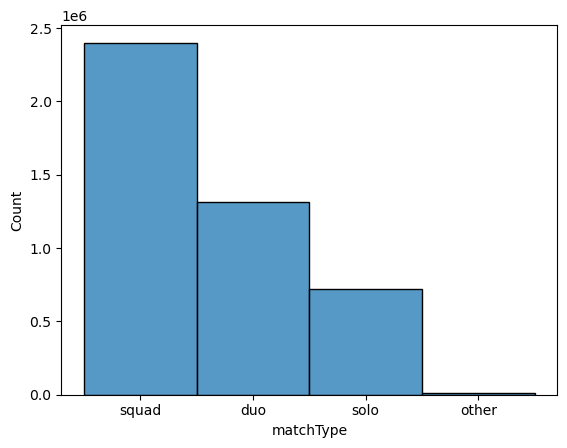

In [10]:
sns.histplot(data['matchType'])
plt.show()

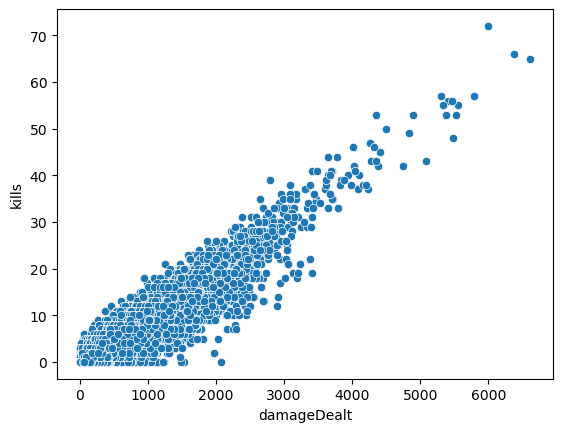

In [11]:
sns.scatterplot(x=data['damageDealt'], y=data['kills'])
plt.show()


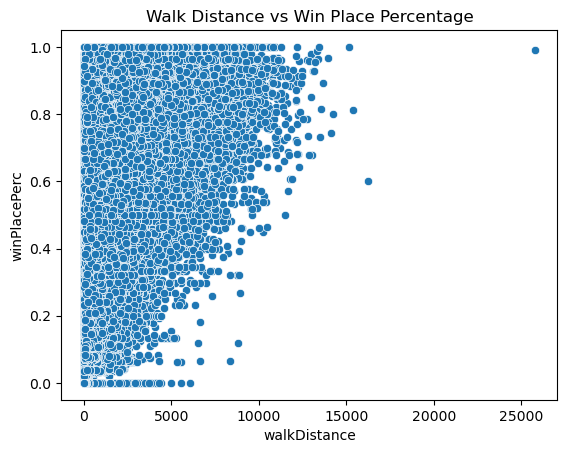

In [16]:
sns.scatterplot(x='walkDistance', y='winPlacePerc', data=data)
plt.title('Walk Distance vs Win Place Percentage')
plt.show()

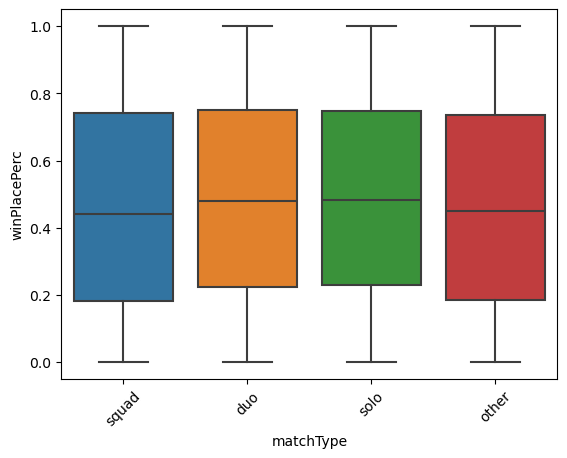

In [12]:
sns.boxplot(x='matchType', y='winPlacePerc', data=data)
plt.xticks(rotation=45)
plt.show()


### Feature Engineering

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0.0,0.0,0.00,0.0,0.0,0.0,1241.0,0.0,0.0,0.0,1306.0,3.0,28.0,-1.0,0.0,0.0000,0.0,0.000,0.0,0.0,244.8,1.0,0.4444
1,0.0,0.0,91.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1777.0,3.0,26.0,1484.0,0.0,0.0045,0.0,11.040,0.0,0.0,1434.0,5.0,0.6400
2,1.0,0.0,68.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.0,0.0,50.0,1491.0,0.0,0.0000,0.0,0.000,0.0,0.0,161.8,2.0,0.7755
3,0.0,0.0,32.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1436.0,3.0,31.0,1408.0,0.0,0.0000,0.0,0.000,0.0,0.0,202.7,3.0,0.1667
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.0,0.0,0.00,0.0,0.0,0.0,1029.0,0.0,0.0,0.0,1873.0,3.0,29.0,-1.0,0.0,1292.0000,0.0,0.000,0.0,0.0,1019.0,3.0,0.1786
4446962,0.0,1.0,44.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1435.0,2.0,93.0,1501.0,0.0,0.0000,0.0,0.000,0.0,0.0,81.7,6.0,0.2935
4446963,0.0,0.0,59.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1321.0,3.0,28.0,1500.0,0.0,0.0000,0.0,2.184,0.0,0.0,788.7,4.0,0.4815
4446964,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0000


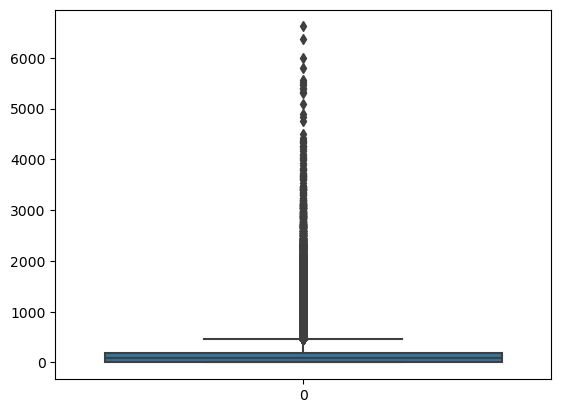

In [33]:
sns.boxplot(data['damageDealt'])
plt.show()

In [35]:
# Handling outliers
Q1 = data['damageDealt'].quantile(0.25)
Q3 = data['damageDealt'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR


In [39]:
data[data['damageDealt'] < l]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [40]:
data[data['damageDealt'] > u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
23,0,6,1011.0,6,2,2,1564,9,2,186.60,...,-1,0,4860.0,0,0.00,0,0,2727.0,7,0.9592
25,1,4,558.6,3,0,4,1265,3,2,237.50,...,-1,0,1183.0,0,0.00,0,0,2711.0,7,0.8696
43,0,1,529.3,3,0,0,1717,3,2,20.10,...,-1,0,0.0,0,0.00,0,0,534.1,4,0.3958
55,2,4,560.8,5,2,9,1355,5,2,28.48,...,-1,0,0.0,0,0.00,0,0,2190.0,7,0.6400
66,0,6,467.8,2,1,6,0,5,1,70.94,...,1526,0,0.0,0,0.00,0,0,4286.0,7,0.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446846,0,3,567.6,0,2,1,1000,6,1,79.30,...,-1,0,0.0,0,92.31,0,0,3103.0,4,1.0000
4446851,1,6,886.3,5,2,3,0,6,2,54.87,...,1484,2,2216.0,0,0.00,0,0,3857.0,11,1.0000
4446912,0,2,479.2,2,1,4,0,3,2,15.71,...,1443,0,0.0,0,0.00,0,0,366.1,3,0.4400
4446942,0,4,724.7,6,4,14,0,7,2,180.30,...,1500,3,5076.0,0,0.00,0,0,2162.0,8,1.0000


In [41]:
data.loc[data['damageDealt'] > u] = data['damageDealt'].median()

In [43]:
data[data['damageDealt'] > u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


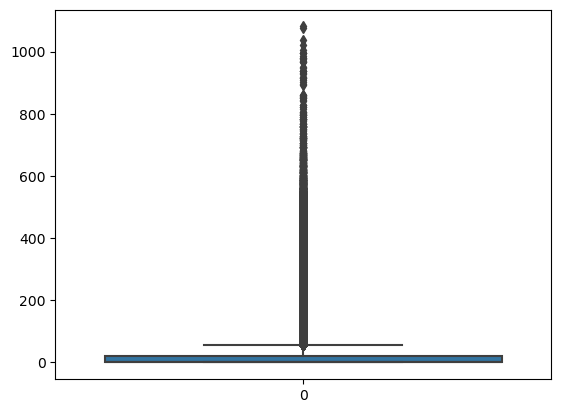

In [46]:
sns.boxplot(data['longestKill'])  
plt.show()

In [47]:
Q1 = data['longestKill'].quantile(0.25)
Q3 = data['longestKill'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR


In [48]:
data[data['longestKill'] < l]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [49]:
data[data['longestKill'] > u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4,0.00,0.00,100.00,0.00,0.00,0.00,0.00,1.00,1.00,58.53,...,1560.00,0.00,0.00,0.00,0.00,0.00,0.00,49.75,2.00,0.1875
22,0.00,1.00,192.30,1.00,2.00,3.00,1022.00,2.00,1.00,280.60,...,-1.00,0.00,2332.00,0.00,0.00,0.00,0.00,1264.00,4.00,0.7500
23,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,...,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.2400
24,0.00,3.00,327.60,4.00,1.00,1.00,1346.00,4.00,2.00,167.80,...,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,3503.00,4.00,0.9231
25,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,...,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446942,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,...,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.2400
4446948,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,...,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.24,84.2400
4446960,0.00,0.00,327.70,3.00,2.00,0.00,0.00,4.00,3.00,90.25,...,1477.00,0.00,180.40,0.00,0.00,0.00,0.00,845.60,3.00,0.2414
4446964,0.00,4.00,180.40,1.00,1.00,2.00,0.00,2.00,1.00,98.50,...,1418.00,2.00,0.00,0.00,0.00,0.00,0.00,2748.00,8.00,0.8000


In [50]:
data.loc[data['longestKill'] > u] = data['longestKill'].median()

In [51]:
data[data['longestKill']>u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


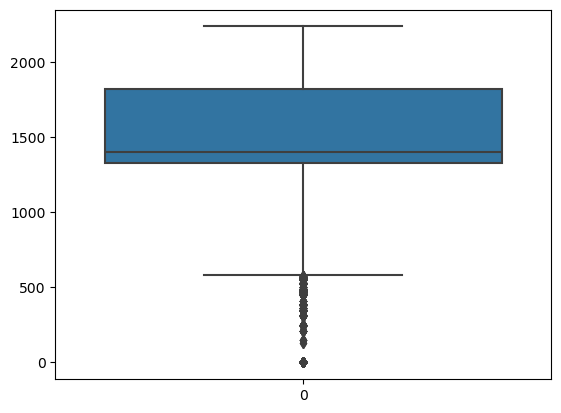

In [55]:
sns.boxplot(data['matchDuration'])  
plt.show()

In [56]:
Q1 = data['matchDuration'].quantile(0.25)
Q3 = data['matchDuration'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR


In [57]:
data[data['matchDuration'] < l]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4446948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4446960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4446964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
data[data['matchDuration']>u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [59]:
data.loc[data['matchDuration'] < l] = data['matchDuration'].median()

In [60]:
data[data['matchDuration'] < l]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


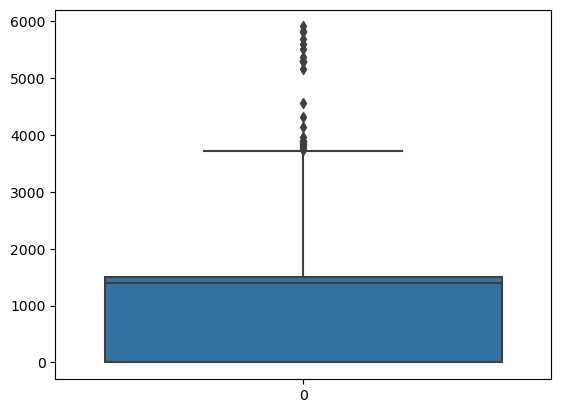

In [62]:
sns.boxplot(data['rankPoints'])
plt.show()

In [63]:
Q1 = data['rankPoints'].quantile(0.25)
Q3 = data['rankPoints'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR


In [64]:
data[data['rankPoints'] < l]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [65]:
data[data['rankPoints'] > u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
14687,1.0,1.0,159.80,2.0,0.0,0.0,0.0,0.0,0.0,0.0000,1366.0,3.0,26.0,5289.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.00,4.0,0.5600
694847,0.0,0.0,282.40,2.0,1.0,0.0,0.0,2.0,1.0,9.4890,1387.0,3.0,28.0,5610.0,0.0,0.0,0.0,0.0,0.0,0.0,269.70,4.0,0.1852
818802,0.0,0.0,210.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0000,1387.0,3.0,28.0,3792.0,0.0,0.0,0.0,0.0,0.0,0.0,471.20,5.0,0.1852
861642,0.0,0.0,245.30,1.0,1.0,0.0,0.0,2.0,1.0,4.8320,1362.0,3.0,27.0,3866.0,0.0,0.0,0.0,0.0,0.0,0.0,125.50,1.0,0.0769
953426,0.0,0.0,311.30,2.0,0.0,0.0,0.0,4.0,2.0,50.0500,1350.0,3.0,25.0,5374.0,0.0,0.0,0.0,0.0,0.0,0.0,287.20,3.0,0.3333
1046051,0.0,2.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,1387.0,3.0,27.0,5827.0,0.0,0.0,0.0,0.0,0.0,0.0,151.40,4.0,0.1923
1145654,0.0,0.0,110.00,2.0,1.0,1.0,0.0,1.0,1.0,27.9700,1397.0,3.0,29.0,5698.0,0.0,0.0,0.0,0.0,0.0,0.0,328.50,3.0,0.3571
1234329,0.0,0.0,125.30,1.0,1.0,0.0,0.0,1.0,1.0,21.9600,1386.0,3.0,28.0,3746.0,0.0,0.0,0.0,0.0,0.0,0.0,2682.00,3.0,0.4815
1447977,0.0,0.0,100.00,1.0,0.0,0.0,0.0,1.0,1.0,0.9794,1345.0,3.0,27.0,5159.0,0.0,0.0,0.0,0.0,0.0,0.0,5.84,1.0,0.0000
1516005,0.0,0.0,228.30,2.0,0.0,0.0,0.0,1.0,1.0,9.2220,1397.0,3.0,29.0,3832.0,1.0,0.0,0.0,0.0,0.0,0.0,313.70,3.0,0.3571


In [66]:
data.loc[data['rankPoints'] > u] = data['rankPoints'].median()

In [67]:
data[data['rankPoints'] > u]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


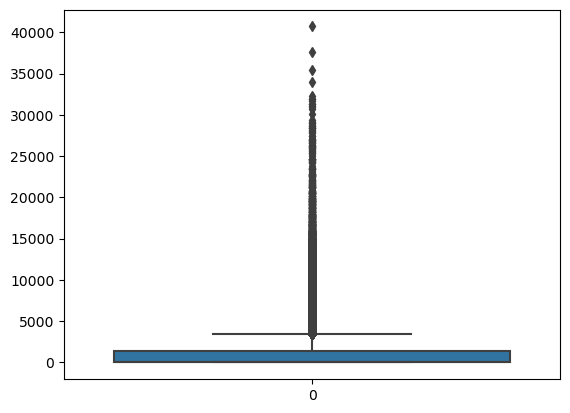

In [68]:
sns.boxplot(data['rideDistance'])
plt.show()

In [69]:
Q1 = data['rideDistance'].quantile(0.25)
Q3 = data['rideDistance'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

In [71]:
data[data['rideDistance'] < l] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [72]:
data[data['rideDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
12,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1774.0,3.0,29.0,1766.0,0.0,6639.0,0.0,0.000,0.0,0.0,2784.0,6.0,0.9286
75,0.0,3.0,164.800,0.0,0.0,9.0,0.0,0.0,0.0,0.00,1867.0,0.0,47.0,1442.0,0.0,5271.0,0.0,9.096,0.0,0.0,1488.0,6.0,0.6522
107,1.0,1.0,58.360,0.0,0.0,2.0,0.0,0.0,0.0,0.00,1708.0,3.0,26.0,1494.0,0.0,5134.0,0.0,0.000,0.0,0.0,2708.0,7.0,1.0000
154,0.0,2.0,0.000,0.0,0.0,5.0,0.0,0.0,0.0,0.00,1895.0,0.0,46.0,1700.0,0.0,3930.0,0.0,0.000,0.0,0.0,2907.0,6.0,0.7333
171,1.0,0.0,2.105,0.0,0.0,0.0,1023.0,0.0,0.0,0.00,1970.0,0.0,46.0,-1.0,0.0,4813.0,0.0,0.000,0.0,0.0,798.1,4.0,0.4222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446831,0.0,5.0,208.700,1.0,0.0,3.0,0.0,0.0,0.0,0.00,1883.0,3.0,27.0,1440.0,0.0,3811.0,0.0,221.900,0.0,0.0,4589.0,6.0,1.0000
4446848,1.0,1.0,196.200,1.0,0.0,3.0,0.0,1.0,1.0,31.61,1983.0,0.0,46.0,1464.0,0.0,5167.0,0.0,0.000,0.0,0.0,2332.0,5.0,0.8444
4446882,0.0,1.0,60.250,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1871.0,2.0,95.0,1601.0,0.0,7176.0,0.0,0.000,0.0,0.0,1890.0,4.0,0.9255
4446893,0.0,2.0,31.850,0.0,0.0,2.0,0.0,0.0,0.0,0.00,1961.0,0.0,48.0,1512.0,0.0,3599.0,0.0,0.000,0.0,0.0,4417.0,7.0,0.7872


In [73]:
data.loc[data['rideDistance'] > u ] = data['rideDistance'].median()

In [74]:
data[data['rideDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


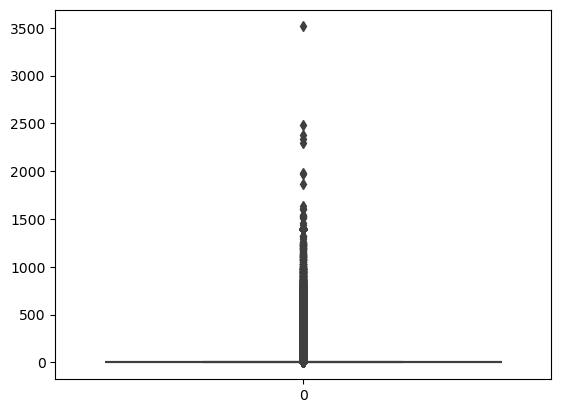

In [75]:
sns.boxplot(data['swimDistance'])
plt.show()

In [86]:
Q1 = data['swimDistance'].quantile(0.25)
Q3 = data['swimDistance'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

In [87]:
data[data['swimDistance'] < l] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [88]:
data[data['swimDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
1,0.0,0.0,91.47,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1777.0,3.0,26.0,1484.0,0.0,0.0045,0.0,11.040,0.0,0.0,1434.0,5.0,0.6400
4,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0000,1398.0,1398.000,1398.0,1398.0,1398.0,1398.0,1398.0000
13,0.0,1.0,324.20,0.0,1.0,5.0,986.0,4.0,1.0,49.83,1886.0,2.0,97.0,-1.0,0.0,1228.0000,0.0,76.840,0.0,0.0,2050.0,6.0,0.8750
14,0.0,1.0,122.80,1.0,0.0,2.0,1411.0,1.0,1.0,37.91,1458.0,3.0,31.0,-1.0,1.0,1237.0000,0.0,60.290,0.0,0.0,1666.0,5.0,0.9000
17,0.0,3.0,254.30,0.0,0.0,12.0,0.0,2.0,1.0,36.00,1371.0,2.0,96.0,1536.0,0.0,2367.0000,0.0,15.290,0.0,0.0,1787.0,3.0,0.8211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446952,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1275.0,3.0,27.0,1483.0,0.0,0.0000,0.0,5.328,0.0,0.0,1177.0,5.0,0.8462
4446960,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0000,1398.0,1398.000,1398.0,1398.0,1398.0,1398.0,1398.0000
4446963,0.0,0.0,59.06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1321.0,3.0,28.0,1500.0,0.0,0.0000,0.0,2.184,0.0,0.0,788.7,4.0,0.4815
4446964,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0,1398.00,1398.0,1398.0,1398.0,1398.0,1398.0,1398.0000,1398.0,1398.000,1398.0,1398.0,1398.0,1398.0,1398.0000


In [89]:
data.loc[data['swimDistance'] > u ]  = data['swimDistance'].median()

In [90]:
data[data['swimDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


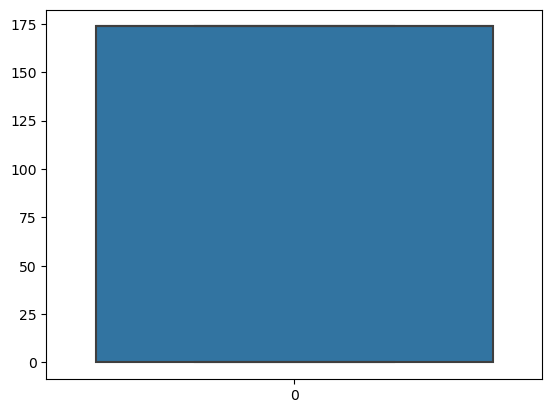

In [103]:
sns.boxplot(data['walkDistance'])
plt.show()

In [98]:
Q1 = data['walkDistance'].quantile(0.25)
Q3 = data['walkDistance'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR

In [99]:
data[data['walkDistance'] < l ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [100]:
data[data['walkDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [101]:
data.loc[data['walkDistance'] > u ]  = data['walkDistance'].median()

In [102]:
data[data['walkDistance'] > u ] 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc


In [13]:
pd.crosstab(data['matchType'], data['rankPoints'])


rankPoints,-1,0,100,105,108,115,130,135,146,159,...,5513,5580,5610,5635,5665,5698,5725,5820,5827,5910
matchType,,,,,,,,,,,,,,,,,,,,,
0,489244,26840,103,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,246336,20336,75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,965946,42333,336,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['matchType'] = label_encoder.fit_transform(data['matchType'])

In [17]:
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


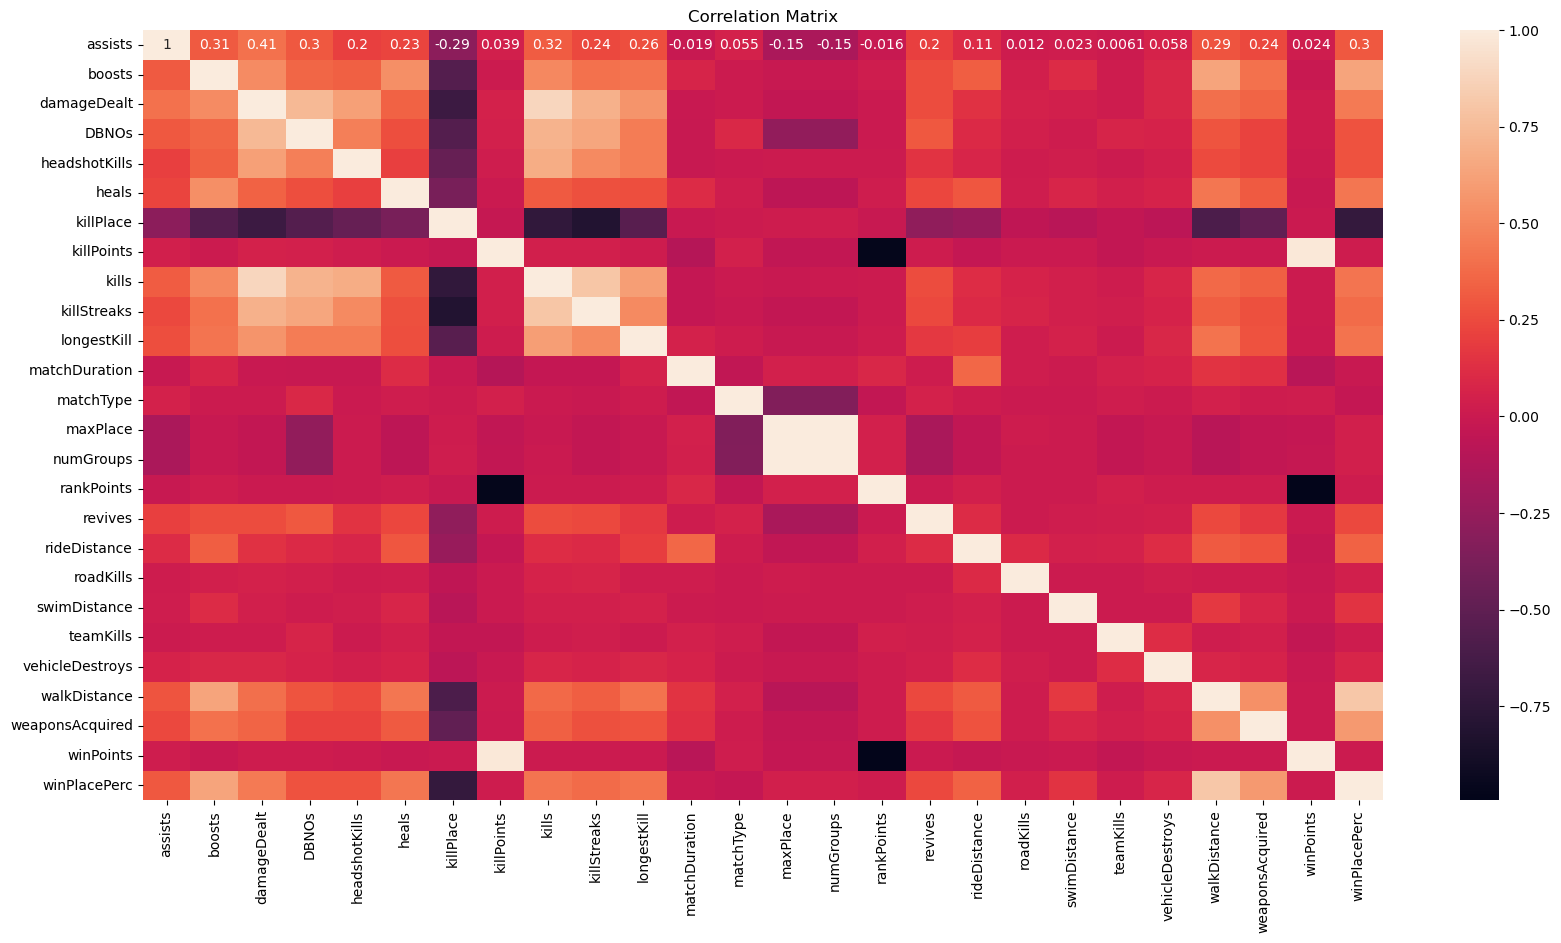

In [18]:
corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [21]:
data = data.drop(['numGroups','winPoints'],axis =1 ) # these columns are highly correlated with other input columns 

In [26]:
data = data.drop(['killPlace'],axis =1) # this column is least correlated with target column

### Splitting the data

In [ ]:
X = data.drop(columns=['winPlacePerc']) 
y = data['winPlacePerc']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calculate RMSE
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results
print(f"Linear Regression - MSE: {mse_linear:.4f}, RMSE: {rmse_linear:.4f}, MAE: {mae_linear:.4f}, R2: {r2_linear:.4f}")


Linear Regression - MSE: 0.0003, RMSE: 0.0170, MAE: 0.0011, R2: 1.0000


### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - MSE: {mse_tree:.4f}, RMSE: {rmse_tree:.4f}, MAE: {mae_tree:.4f}, R2: {r2_tree:.4f}")

Decision Tree - MSE: 0.0005, RMSE: 0.0230, MAE: 0.0012, R2: 1.0000


### XG Boosting

In [110]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R2: {r2_xgb:.4f}")

XGBoost - MSE: 0.0003, RMSE: 0.0167, MAE: 0.0011, R2: 1.0000


### Results

Linear Regression or XGBoost could be considered the best, given they tie in terms of MSE, RMSE, and MAE. If looking for a simpler, interpretable model, Linear Regression is ideal. If looking for a more complex model with potentially better performance on non-linear data (especially for larger datasets), XGBoost might be preferred.

### Model Comparison Report

Loading Dataset: Successfully loaded the dataset and verified its structure.
Basic Checks:
Checked for null values and dropped them.
Identified and removed duplicate rows.
Dropped Irrelevant Columns:
Removed columns like id, matchId, and groupId as they were irrelevant to the analysis.
Feature Engineering:
Grouped matchType into four categories: solo, duo, squad, and other.
Exploratory Data Analysis (EDA):
Conducted univariate and bivariate analysis to understand feature distributions and relationships.
Outlier Handling:
Replaced outliers in numerical columns (e.g., damageDealt) with the median value.
Encoding Categorical Data:
Applied label encoding to the matchType column.
Correlation Analysis:
Dropped highly correlated features and those least correlated with the target variable.
Data Scaling:
Applied StandardScaler to standardize the features.

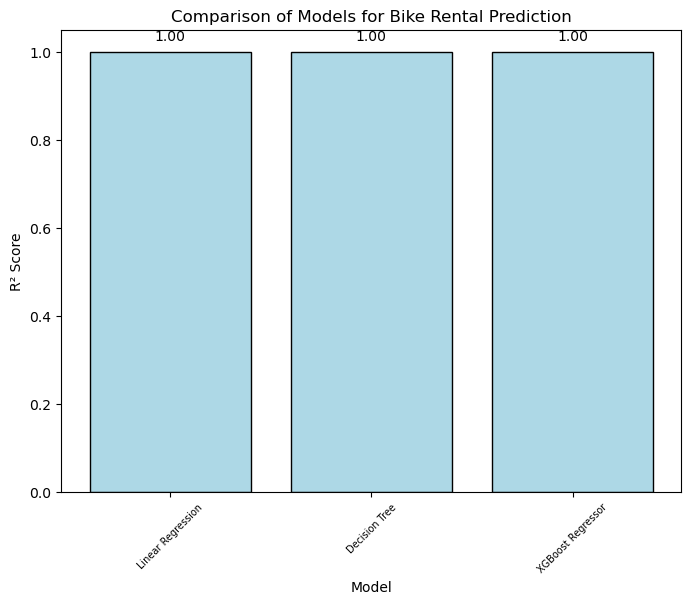

In [111]:
AllScoreOfTheModel = {
    'Linear Regression':1.0,      
    'Decision Tree': 1.0,    
    'XGBoost Regressor': 1.0 
}

keys = AllScoreOfTheModel.keys()
values = AllScoreOfTheModel.values()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color='lightblue', edgecolor='black')  

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Models for Bike Rental Prediction')
plt.xticks(rotation=45, fontsize=7)

# Annotate each bar with its score
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Report on Challenges faced

1] Grouping Match Types: Categorizing matchType into solo, duo, squad, and other required domain understanding to ensure meaningful grouping.
Balancing simplicity and retaining information during this step was critical.

2] Detecting and handling outliers in numerical features was challenging as removing or modifying these values directly impacted the feature distributions. Choosing to replace outliers with the median involved balancing data integrity and model performance.

3] Dropping highly correlated features required careful analysis to ensure that relevant and informative features were retained.It was challenging to balance reducing multicollinearity and keeping essential features for the model.
